In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib as plt

# Packages for text pre-processing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Package for splitting the input data
from sklearn.model_selection import train_test_split

# Metrics to evaluate model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Packages for building an ML model
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [2]:
# Dataset - E-commerce customer service questions and topics
# https://github.com/sambit9238/Machine-Learning/blob/master/question_topic.csv
questions_df = pd.read_csv('./datasets/question_topic.csv', index_col=0)
questions_df.sample(5)

,question_text,question_topic
1873,I'm not sure I want to order the Komplete Meal...,Product Comparison
1021,Do you have any laptops made by either HP or D...,Product Availability
4205,What's the difference in the dimensions of thi...,Product Comparison
1211,Is there any restocking fee or processing fee ...,Returns & Refunds
3032,Could you tell me which shoes are lighter- the...,Product Comparison


In [3]:
print(questions_df.question_text[100])
print(questions_df.question_topic[100])

When do you think I'd receive the SKU #: 089836185259 if I order it tomorrow and it's being shipped to Oakland, CA? Do you have an overnight shipping option?
Shipping


In [4]:
questions_df.shape

(5000, 2)

In [5]:
questions_df.question_topic.unique() # all questions are related to 7 unique topics

array(['Sales/Promotions', 'Shipping', 'Product Availability',
       'Product Specifications', 'Omnichannel', 'Product Comparison',
       'Returns & Refunds'], dtype=object)

In [6]:
questions_df['question_topic'].value_counts()

Product Specifications    839
Product Availability      833
Product Comparison        806
Shipping                  799
Returns & Refunds         768
Sales/Promotions          505
Omnichannel               450
Name: question_topic, dtype: int64

In [7]:
X = questions_df['question_text']
y = questions_df['question_topic']

In [8]:
count_vectorizer = CountVectorizer(ngram_range=(2,2))
transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector.shape

(5000, 29892)

In [9]:
tfidf_transformer = TfidfTransformer()
tfidf_vector = tfidf_transformer.fit_transform(transformed_vector)
tfidf_vector.shape

(5000, 29892)

In [92]:
print(tfidf_vector)

  (0, 29738)	0.2303985524612963
  (0, 28035)	0.13266554675673636
  (0, 27286)	0.10117945692047296
  (0, 21934)	0.13582851989218203
  (0, 21840)	0.23583585694492787
  (0, 21417)	0.2011476652439135
  (0, 21091)	0.23583585694492787
  (0, 20426)	0.23583585694492787
  (0, 19870)	0.23583585694492787
  (0, 18216)	0.23583585694492787
  (0, 14902)	0.23583585694492787
  (0, 12510)	0.14232723921225174
  (0, 12306)	0.23583585694492787
  (0, 11977)	0.16172945775721478
  (0, 11535)	0.24249057980595187
  (0, 10569)	0.2303985524612963
  (0, 10168)	0.1513420434342682
  (0, 10112)	0.21516439966390868
  (0, 9345)	0.23583585694492787
  (0, 9146)	0.23583585694492787
  (0, 9136)	0.20972709518027713
  (0, 6978)	0.21830652511664078
  (0, 6328)	0.2011476652439135
  (1, 28842)	0.14030114298258498
  (1, 28724)	0.1472371420783196
  :	:
  (4999, 28480)	0.08125477889722638
  (4999, 27202)	0.10251382991590834
  (4999, 26164)	0.18512573275219965
  (4999, 24372)	0.20563401047264745
  (4999, 19887)	0.22316357663728592


In [10]:
X_dense = tfidf_vector.todense() # naive bayes requires the input be in a form of dense matrix
X_dense.shape

(5000, 29892)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2)
x_train.shape, x_test.shape

((4000, 29892), (1000, 29892))

In [12]:
# helper function
def summarize_classification(y_test, y_pred, avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    precision = precision_score(y_test, y_pred, average=avg_method) 
    recall = recall_score(y_test, y_pred, average=avg_method)
    cm = confusion_matrix(y_test, y_pred)
    
    print('Length of the testing data: ', len(y_test))
    print('Accuracy count: ', num_acc)
    print('Accuracy score: ', acc)
    print('Precision score: ', precision)
    print('Recall score: ', recall)
    cm_display = ConfusionMatrixDisplay(cm).plot()

In [13]:
clf = GaussianNB().fit(np.array(x_train), y_train)

Length of the testing data:  1000
Accuracy count:  956
Accuracy score:  0.956
Precision score:  0.9558991688041343
Recall score:  0.956


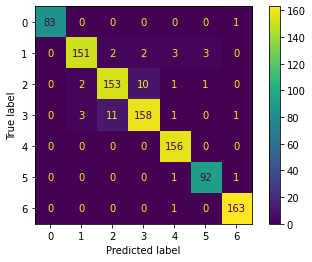

In [14]:
y_pred = clf.predict(np.array(x_test))
summarize_classification(y_test, y_pred)

In [15]:
pred_results = pd.DataFrame({'y_test':pd.Series(np.array(y_test)),
                            'y_pred':pd.Series(y_pred)})

pred_results.sample(15)

,y_test,y_pred
607,Product Comparison,Product Comparison
525,Product Availability,Product Availability
866,Omnichannel,Omnichannel
23,Returns & Refunds,Returns & Refunds
666,Sales/Promotions,Sales/Promotions
771,Product Availability,Product Availability
731,Product Specifications,Product Specifications
308,Returns & Refunds,Returns & Refunds
959,Product Specifications,Product Specifications
549,Product Comparison,Product Comparison


In [87]:
new = ["Hello! I have cancelled my order #4352 right after submission. How long will it take to get the refund?",
      "Hi! I have referred my friend to your conpany. Ho to get referral bonus?", 
      "I am dissapoitedd with the quality of the product."]

transformed_vector_new = count_vectorizer.transform(new)
tfidf_vector_new = tfidf_transformer.fit_transform(transformed_vector_new)

In [88]:
tfidf_vector_new.shape

(3, 29892)

In [89]:
new_dense = tfidf_vector_new.todense()

In [90]:
y_pred_new = clf.predict(np.array(new_dense))
print(y_pred_new)

['Returns & Refunds' 'Sales/Promotions' 'Product Specifications']
